<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP2/Tp2_CyT_CLAUDINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob
from pathlib import Path
import community
!pip install networkx
!pip install powerlaw
!pip install community
import powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=f6426b9ecab110e408017bc81dad80d27ee3c5ed4f57ba2f0ba391fe7b1f9ff9
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [2]:
# Descomprimo el ZIP
!unzip DataSujetos.zip

Archive:  DataSujetos.zip
   creating: DataSujetos/
  inflating: DataSujetos/N1_suj1.csv  
  inflating: DataSujetos/N1_suj10.csv  
  inflating: DataSujetos/N1_suj11.csv  
  inflating: DataSujetos/N1_suj12.csv  
  inflating: DataSujetos/N1_suj13.csv  
  inflating: DataSujetos/N1_suj14.csv  
  inflating: DataSujetos/N1_suj15.csv  
  inflating: DataSujetos/N1_suj16.csv  
  inflating: DataSujetos/N1_suj17.csv  
  inflating: DataSujetos/N1_suj18.csv  
  inflating: DataSujetos/N1_suj2.csv  
  inflating: DataSujetos/N1_suj3.csv  
  inflating: DataSujetos/N1_suj4.csv  
  inflating: DataSujetos/N1_suj5.csv  
  inflating: DataSujetos/N1_suj6.csv  
  inflating: DataSujetos/N1_suj7.csv  
  inflating: DataSujetos/N1_suj8.csv  
  inflating: DataSujetos/N1_suj9.csv  
  inflating: DataSujetos/N2_suj1.csv  
  inflating: DataSujetos/N2_suj10.csv  
  inflating: DataSujetos/N2_suj11.csv  
  inflating: DataSujetos/N2_suj12.csv  
  inflating: DataSujetos/N2_suj13.csv  
  inflating: DataSujetos/N2_suj14.csv 

#  TP2: Redes en el Cerebro

# 1. Visualización


In [3]:
def subjectmatrix2graphslist_2(correlation_matrix, densities):
    """
    Toma una matriz de input y devuelve una lista de grafos con la densidad de aristas correspondiente
    """
    
    n = correlation_matrix.shape[0]
    n2m1 = (n*n-1)
    
    sorted_correlations = sorted(correlation_matrix.values.flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*n2m1)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs


   ### Calculo Matriz Promedio por Estadíos

In [5]:
## Aqui comienza

estadios=["W","N1","N2","N3"]
matrices=[]

for e in estadios:
    # inicializo matriz con ceros  
    matriz_promedio = []
    for i in range(116):
        a = [0]*116
        matriz_promedio.append(a)
      
    # leo y sumo las matrices de todos los sujetos para el estadio e 
    filenames = glob('DataSujetos/'+e+'_*.csv')   
    for filename in filenames:
        correlation_matrix = pd.read_csv(filename, header=None)
        n = correlation_matrix.shape[0]
        correlation_matrix -= np.diag(np.ones(n))
        matriz_promedio= np.add(matriz_promedio, correlation_matrix)

    # Hago el promedio
    matriz_promedio= matriz_promedio/18
    # La guardo 
    matrices.append(matriz_promedio)
print(matrices)

    

[          0         1         2    ...       113       114       115
0    0.000000  0.875693  0.640179  ...  0.481611  0.413802  0.188360
1    0.875693  0.000000  0.585738  ...  0.468672  0.374851  0.200169
2    0.640179  0.585738  0.000000  ...  0.440531  0.399424  0.225343
3    0.620273  0.614653  0.844262  ...  0.414304  0.389722  0.215749
4    0.537648  0.510480  0.725156  ...  0.381786  0.299067  0.138788
..        ...       ...       ...  ...       ...       ...       ...
111  0.512767  0.495661  0.443559  ...  0.720990  0.645444  0.211643
112  0.438433  0.400285  0.447182  ...  0.752909  0.628123  0.187033
113  0.481611  0.468672  0.440531  ...  0.000000  0.749758  0.303311
114  0.413802  0.374851  0.399424  ...  0.749758  0.000000  0.355704
115  0.188360  0.200169  0.225343  ...  0.303311  0.355704  0.000000

[116 rows x 116 columns],           0         1         2    ...       113       114       115
0    0.000000  0.904321  0.735057  ...  0.479057  0.349738  0.158671
1    0

<Figure size 432x432 with 0 Axes>

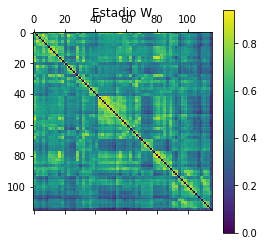

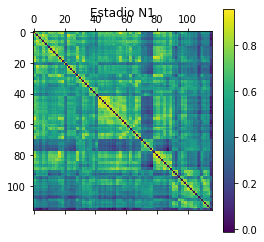

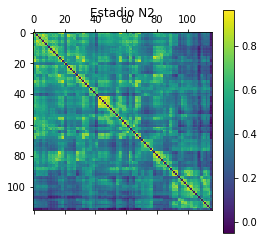

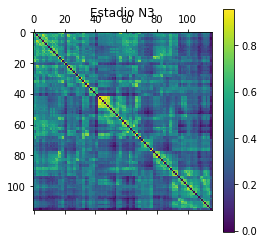

In [6]:
plt.figure(figsize=(6,6))
for i, e in enumerate(estadios):    
#   plt.subplot(2,2,i+1)
    plt.matshow(matrices[i])
    plt.colorbar()
    plt.title('Estadio '+e)
    

W 0
N1 1
N2 2
N3 3


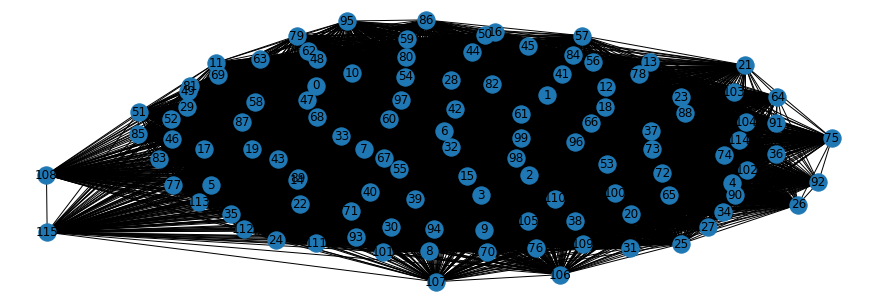

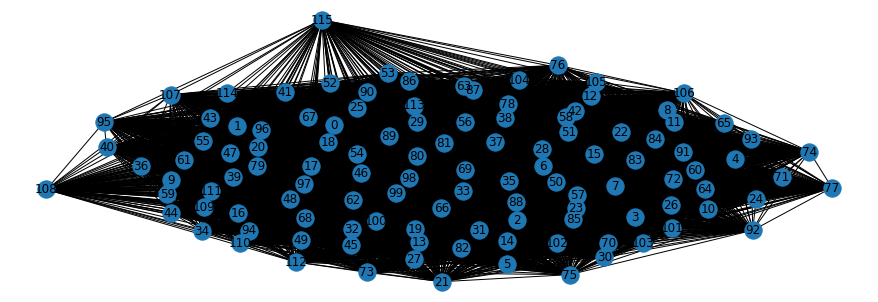

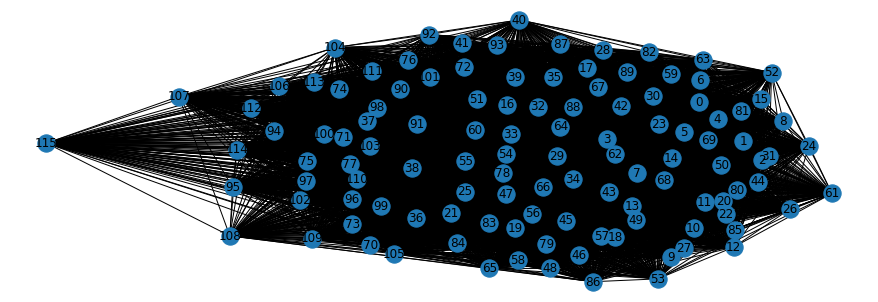

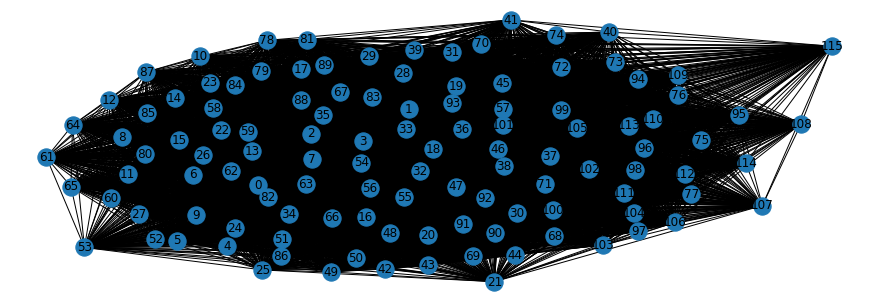

In [7]:
for i, e in enumerate(estadios):    
    print(e, i)
    G_promedio = nx.from_pandas_adjacency(matrices[i])
    plt.figure(figsize=(12,4))
    #plt.subplot(131)
    nx.draw(G_promedio, with_labels=True)

W 0
N1 1
N2 2
N3 3


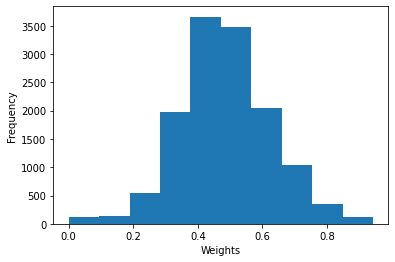

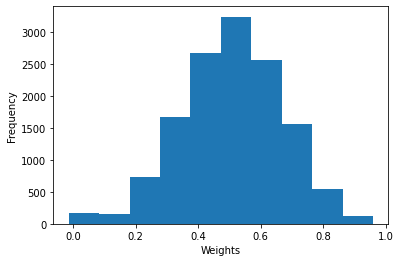

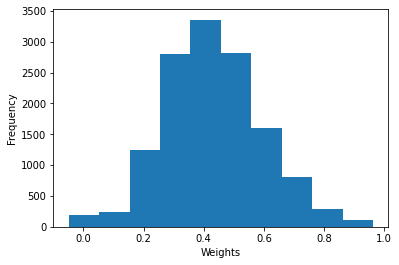

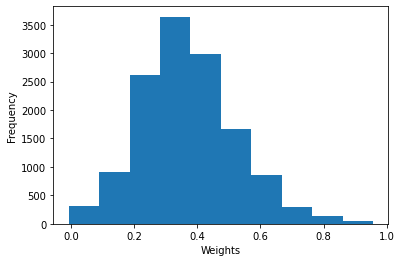

In [8]:
for i, e in enumerate(estadios):    
    print(e, i)
    plt.figure()
    plt.hist(matrices[i].values.flatten())
    plt.ylabel('Frequency')
    plt.xlabel('Weights');


In [9]:
# Para cada estadío, genero grafos para 50 densidades entre 0 y 0.3
# Estos serían los grafos no pesados para distintas densidades

estadios=["W","N1","N2","N3"]
densities = np.linspace(0,0.3,50)

graphs = {}
for i,e in enumerate(estadios):
    Gs = subjectmatrix2graphslist_2(matrices[i], densities)
    name = e
    print(i)
    graphs[name] = Gs


    

0
1
2
3


In [10]:
graphs["W"]

## 


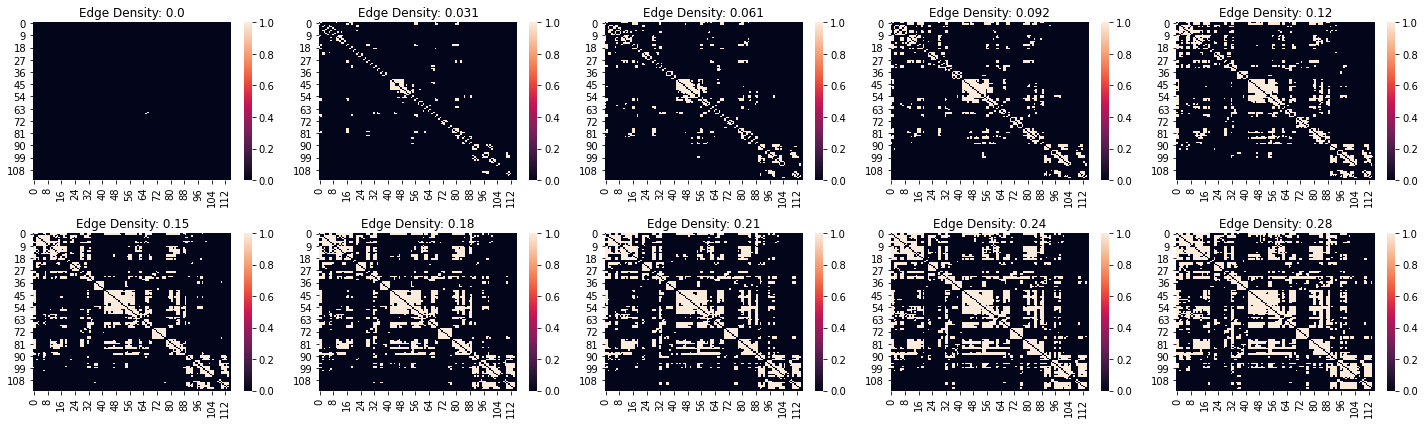

In [11]:
# Muestro matrices de estadío "W", para algunas densidades (::5 entiendo que esto va cada 5, y entonces trae 10 grafos )

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['W'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

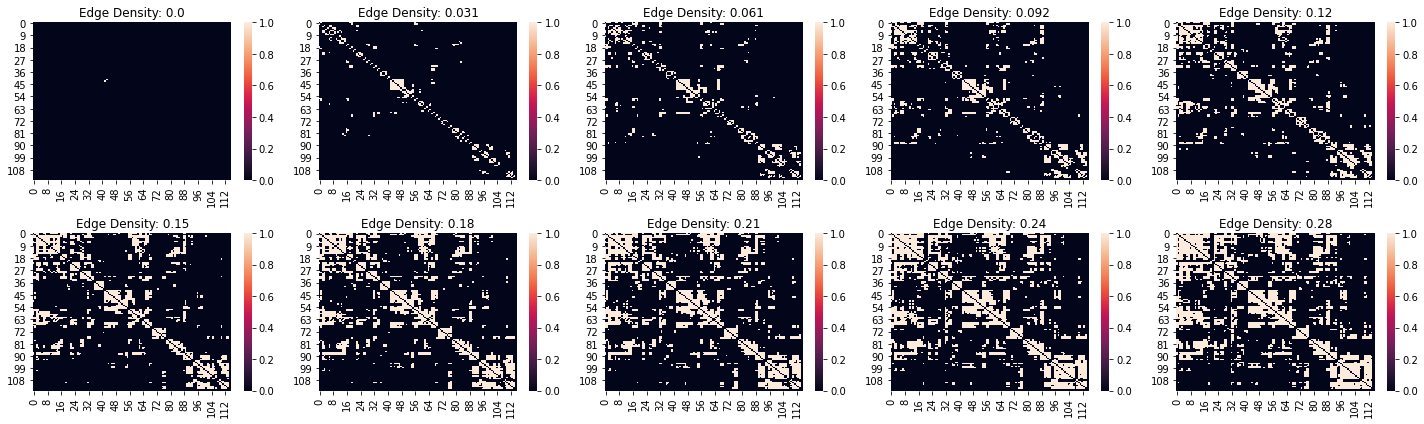

In [12]:
# Igual que lo anterior para estadío N3

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['N3'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

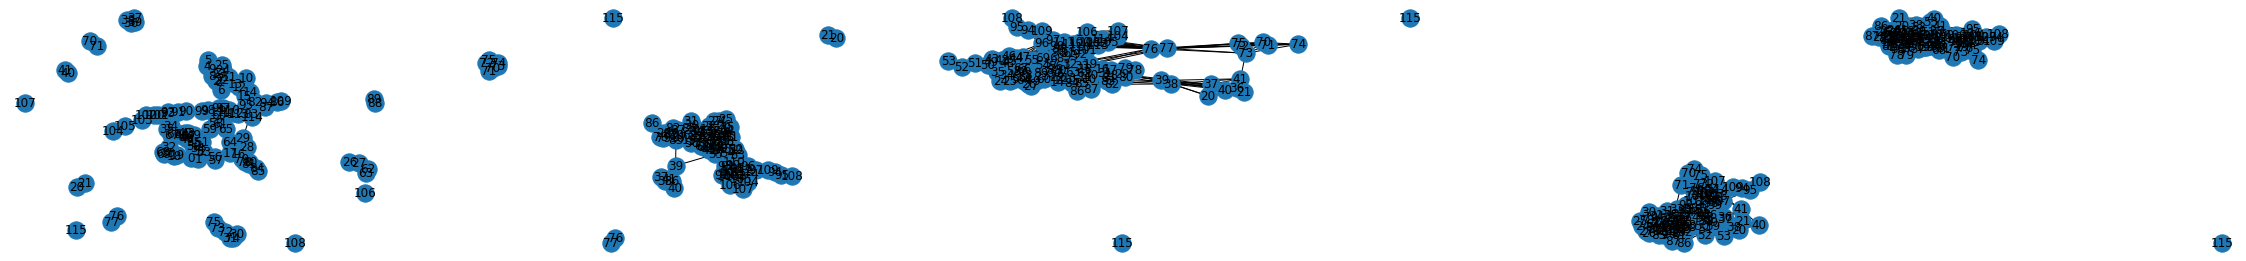

In [14]:
# Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes. 
# visualizarlo como grafo 

plt.figure(figsize=(40,10))
plt.subplot(2,5,1)
nx.draw(graphs['N3'][5],with_labels=True)
plt.subplot(2,5,2)
nx.draw(graphs['N3'][15],with_labels=True)
plt.subplot(2,5,3)
nx.draw(graphs['N3'][25],with_labels=True)
plt.subplot(2,5,4)
nx.draw(graphs['N3'][35],with_labels=True)
plt.subplot(2,5,5)
nx.draw(graphs['N3'][45],with_labels=True)


## Tarea 2

In [15]:
W=matrices[0]
W.to_numpy()

W=W.to_numpy()
G_obs = nx.from_numpy_matrix(W)# u

In [16]:
pos=nx.spring_layout(graphs["W"][12], k=0.4)

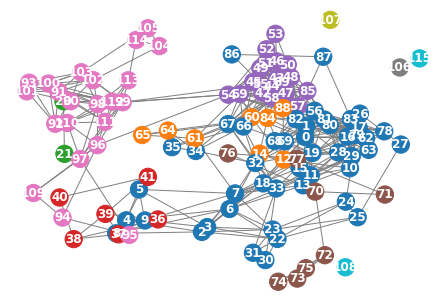

In [17]:
modulos = community.best_partition(graphs["W"][12])
values_obs = [v for n,v in modulos.items()]
nx.draw(graphs["W"][12],pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs, font_color='white', edge_color='gray')

In [18]:
#Es el comando best_partition. Luego se le mide la modularidad al resultado de best_partition y en principio ahí te da el número.
estadio=[]
comunidades=[]
densidad=[]
modularidad=[]

for e in estadios:
    for i,G in enumerate (graphs[e][::5][:10]):
        estadio.append(e)
        densidad.append(densities[i*5])
        partition=community.best_partition(G)
        comunidades.append(float(len(set(partition.values()))))
        modularidad.append(community.modularity(partition,G))


<function matplotlib.pyplot.show>

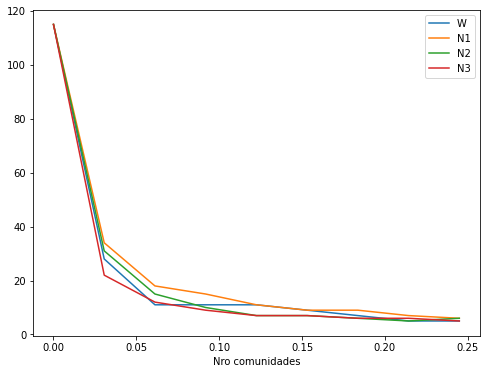

In [19]:
plt.figure(figsize=(8,6))
plt.plot(densidad[0:9],comunidades[0:9], label="W")
plt.plot(densidad[0:9],comunidades[10:19], label="N1")
plt.plot(densidad[0:9],comunidades[20:29], label="N2")
plt.plot(densidad[0:9],comunidades[30:39], label="N3")
plt.xlabel("densidad")
plt.xlabel("Nro comunidades")
plt.legend();
plt.show


<function matplotlib.pyplot.show>

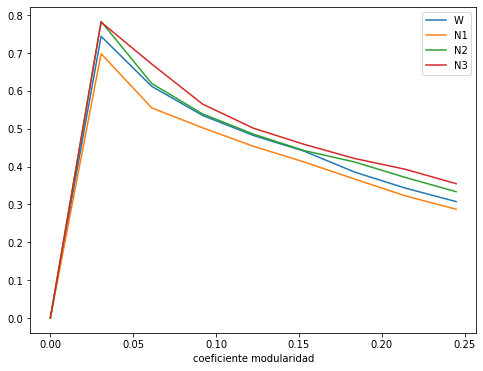

In [20]:
plt.figure(figsize=(8,6))
plt.plot(densidad[0:9],modularidad[0:9], label="W")
plt.plot(densidad[0:9],modularidad[10:19], label="N1")
plt.plot(densidad[0:9],modularidad[20:29], label="N2")
plt.plot(densidad[0:9],modularidad[30:39], label="N3")
plt.xlabel("densidad")
plt.xlabel("coeficiente modularidad")
plt.legend();
plt.show

In [ ]:
##Tarea 2 Red random

/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


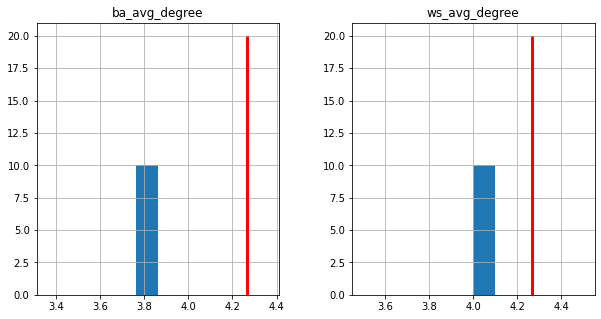

In [21]:
repetitions = 50
data = []
for i in range(repetitions):
    d = {}
    G = nx.barabasi_albert_graph(graphs["W"][12].number_of_nodes(),4,seed=i)
    d['ba_avg_clus'] = nx.average_clustering(G)
    d['ba_avg_degree'] = G.number_of_edges()/G.number_of_nodes()
    d['ba_alpha'] = powerlaw.Fit([d for n, d in G.degree],discrete=True,xmin=8).alpha
    G = nx.gnm_random_graph(graphs["W"][12].number_of_nodes(),graphs["W"][12].number_of_edges())    
    d['er_avg_clus'] = nx.average_clustering(G)
    G = nx.watts_strogatz_graph(graphs["W"][12].number_of_nodes(),8,0.02)
    d['ws_avg_degree']=G.number_of_edges()/G.number_of_nodes()
    d['ws_avg_clus'] = nx.average_clustering(G)
    data.append(d)

G1=graphs["W"][12]
promedio=G1.number_of_edges()/G1.number_of_nodes()
df = pd.DataFrame(data)
axs = df.filter(regex='avg_degree').hist(figsize=(10,5),density=True)
for ax in axs.flatten():
    ax.vlines(promedio,0,20,lw=3,color='r')

In [ ]:
df_per_degree = pd.DataFrame(G_per.degree,columns=['Node','Degree']).set_index('Node')
df_obs_degree = pd.DataFrame(G_obs.degree,columns=['Node','Degree']).set_index('Node')


plt.figure(figsize=(8,4));
df_obs_degree.hist(density=True, histtype='step',label='Observado', cumulative=-1);
df_per_degree.hist(density=True,ax=plt.gca(), histtype='step',label='Percibido', cumulative=-1);
plt.legend();

NameError: name 'df_obs_degree' is not defined

<Figure size 576x288 with 0 Axes>

In [22]:
def plotComparacionesNx_W(ttests, correccion = None):
    plt.figure(figsize = (30,20))

    metricas = {'Modularidad': 'Q', 'Numero de Comunidades': 'Nc'}
    nro_subplot = 1

    for metrica in metricas:
        metrica_val = metricas[metrica]
        for etapa in ['N1', 'N2', 'N3']:
            # Filtramos los sujetos del estadio Nx
            filtro = ttests.query('Nx == "' + etapa + '"')

            # Config inicial del subplot
            plt.subplot(3, 3, nro_subplot)
            plt.title('W vs ' + etapa)
            plt.xlabel('Densidad de aristas (d)')
            plt.ylabel(metrica + ' (' + metrica_val + ')')

            # Plot curva Nx
            plt.errorbar(rango_tp, filtro['mean_Nx_' + metrica_val], yerr = filtro['sem_Nx_' + metrica_val], label = metrica + ' - ' + etapa)
            # Plot curva W
            plt.errorbar(rango_tp, filtro['mean_W_' + metrica_val], yerr = filtro['sem_Nx_' + metrica_val], label = metrica + ' - W')
            # Plot puntos significativos
            label = 'Significativas'
            if correccion:
                label += ' ' + correccion
                filtro_pvalue = filtro[ isSignificative(filtro['pvalue_' + metrica_val], nivel_signif, {'metodo': correccion, 'n': len(rango_tp)}) ]
            else:
                filtro_pvalue = filtro[ isSignificative(filtro['pvalue_' + metrica_val], nivel_signif) ]
            #filtro_pvalue = filtro.query('pvalue_' + metrica_val + ' < ' + str(nivel_signif))
            plt.plot(filtro_pvalue.densidad, np.repeat(0, filtro_pvalue.shape[0]), color='green', marker='o', linestyle='none', markersize=6, label=label)

            # Config leyenda del subplot
            leg = plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)
            leg.get_frame().set_alpha(0.5)
            
            nro_subplot += 1

In [ ]:
#armar dataframe de tests

#'mean_Nx_' 
#'mean_W_'
#'pvalue_'
#'sem_Nx_'

